# 使用Keras对泰坦尼克号旅客生存进行预测

In [2]:
import os
import urllib.request

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing

In [3]:
## 旅客数据集准备
data_url = "https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"

data_file_path = "Data/titanic3.xls"

if not os.path.isfile(data_file_path):
    result = urllib.request.urlretrieve(data_url, data_file_path)
    print("Downloaded: ", result)
else:
    print(data_file_path, "Data file already exists")

Data/titanic3.xls Data file already exists


## 使用 Pandas 对数据进行处理

In [4]:
# 读取数据，结果为 DataFrame 格式
df_data = pd.read_excel(data_file_path)

In [5]:
# 查看数据摘要
df_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## 筛选特征字段

| **字段**   | **字段说明**        | **数据说明**                               |
|----------|-----------------|----------------------------------------|
| pclass   | 舱等              | 1：头等舱，2：二等舱，3：三等舱                      |
| survival | 是否生存            | 0：否，1：是                                |
| name     | 姓名              |                                        |
| sex      | 性别              | female：女性，male：男                       |
| age      | 年龄              |                                        |
| slibsp   | 兄弟姐妹或者配偶也在船上的数量 |                                        |
| parch    | 双亲或者子女也在船上的数量   |                                        |
| ticket   | 船票号码            |                                        |
| fare     | 船票费用            |                                        |
| cabin    | 舱位号码            |                                        |
| embarked | 登船港口            | C=Cherbourg，Q=Queenstown，S=Southampton |


In [7]:
# survival（是否生存）是标签字段，其他是候选特征字段
# 筛选提取需要的特征字段，去掉ticket，cabin等
selected_cols = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]

selected_df_data = df_data[selected_cols]

In [8]:
selected_df_data

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",3,female,14.5000,1,0,14.4542,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C


In [9]:
# Pandas 判断缺失值一般采用isnull()，生成所有数据的True/False矩阵
# 这是元素级别的判断，把对应的所有元素的位置都列出来，元素为空或者为NA就显示为True，否则为False
selected_df_data.isnull()

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,True,False,False,False,False
1306,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False


In [10]:
# 判断哪一列有空值
selected_df_data.isnull().any()

survived    False
name        False
pclass      False
sex         False
age          True
sibsp       False
parch       False
fare         True
embarked     True
dtype: bool

In [11]:
# 判断每一列中有空值的个数
selected_df_data.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [12]:
# 显示存在空值的列，确定缺失位置
selected_df_data[selected_df_data.isnull().values == True]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
15,0,"Baumann, Mr. John D",1,male,NaN,0,0,25.9250,S
37,1,"Bradley, Mr. George (""George Arthur Brayton"")",1,male,NaN,0,0,26.5500,S
40,0,"Brewe, Dr. Arthur Jackson",1,male,NaN,0,0,39.6000,C
46,0,"Cairns, Mr. Alexander",1,male,NaN,0,0,31.0000,S
59,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",1,female,NaN,0,0,27.7208,C
...,...,...,...,...,...,...,...,...,...
1293,0,"Williams, Mr. Howard Hugh ""Harry""",3,male,NaN,0,0,8.0500,S
1297,0,"Wiseman, Mr. Phillippe",3,male,NaN,0,0,7.2500,S
1302,0,"Yousif, Mr. Wazli",3,male,NaN,0,0,7.2250,C
1303,0,"Yousseff, Mr. Gerious",3,male,NaN,0,0,14.4583,C


## 数据预处理函数

In [13]:
def prepare_data(df_data):
    # 删除姓名列
    # drop不改变原有df中的数据，而是返回另一个DataFrame来存放删除后的数据
    # axis = 1：代表删除列
    df = df_data.drop(["name"], axis=1)

    # 填充null值（缺失值）
    # 此处均填充为平均值
    # -------------------------------------------------------------------------
    # 为缺失值age记录填充值
    age_mean = df["age"].mean()
    df["age"] = df["age"].fillna(age_mean)
    # -------------------------------------------------------------------------
    # 为缺失值fare记录填充值
    fare_mean = df["fare"].mean()
    df["fare"] = df["fare"].fillna(fare_mean)
    # -------------------------------------------------------------------------
    # 性别sex由字符转换成数字编码
    df["sex"] = df["sex"].map({"female": 0, "male": 1}).astype(int)
    # -------------------------------------------------------------------------
    # 为缺失值embarked记录填充值
    df["embarked"] = df["embarked"].fillna("S")
    # 港口embarked由字母表示转换为数字编码
    df["embarked"] = df["embarked"].map({"C": 0, "Q": 1, "S": 2}).astype(int)

    # 转换为ndarray数组（numpy格式数组）
    ndarray_data = df.values

    # 分离特征值和标签值
    # ------------------------------------
    # 第0列是标签值（survival列）
    # [行，列]
    # 保留所有行，列值从第1列（第0列）开始填充
    label = ndarray_data[:, 0]
    # ------------------------------------
    # 后 1 ~ 8列为特征值（性别等）
    # [行，列]
    # 保留所有行，列值从第2列（第1列）开始填充
    features = ndarray_data[:, 1:]

    # 如有以下例子：
    # 制作一份鸡汤，需要用到鸡、水、姜、葱、蒜、盐等材料，但材料间的取值范围均不相同
    # 水的取值范围可能在2000克到3000克，但相比较之下盐可能仅需要1克2克，这样的取值范围在多元线性回归中是不合理的
    # ----------------------------------------------------------------------------------------
    # 为防止不同特征值取值范围之间的差异性，需要对特征数据进行归一化
    # 归一化过程：[特征值 / max(特征值) - min(特征值)]
    # ----------------------------------------------------------------------------------------
    # 对特征数据列进行归一化（缩小差异区间至0~1）处理
    # 利用sklearn封装API特征值标准化
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    norm_features = minmax_scale.fit_transform(features)

    return norm_features, label

## 数据准备

In [14]:
# shuffle，打乱数据顺序，为后面训练做准备
# 通过Pandas的抽样函数sample实现，frac为百分比
# selected_df_data数据保持不变
# frac=1代表全部数据都需要进行打乱
shuffle_df_data = selected_df_data.sample(frac=1)

In [15]:
# 处理后的数据集
# x_data = norm_features
# y_data = label

# FIX THIS
x_data, y_data = prepare_data(shuffle_df_data)

In [16]:
# 划分训练集和测试集
train_size = int(len(x_data) * 0.8)

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_test = x_data[train_size:]
y_test = y_data[train_size:]

## 建立模型结构

In [17]:
# 建立Keras序列模型
# 7（本例中有7个特征，故输入层为7个神经元） -> 64 -> 32 -> 1（本例中生存值只有0与1两个值，故输出层只有一个神经元）
model = tf.keras.models.Sequential()

In [18]:
# 第一层隐层
model.add(tf.keras.layers.Dense(
    units=64,  # 神经元个数
    input_dim=7,  # 输入层传递个数，也可不指定，等效于input_shape
    use_bias=True,  # 是否使用偏置项
    kernel_initializer="uniform",  # 权重初始化方式，此处为unifrom分布
    bias_initializer="zeros",  # 偏置项初始化值
    activation="relu",  # 激活函数
))

In [19]:
# 防止层级间过拟合
# model.add(tf.keras.layers.Dropout(rate=0.3))

In [20]:
# 第二层隐层
model.add(tf.keras.layers.Dense(
    units=32,
    activation="sigmoid"
))

In [21]:
# 防止层级间过拟合
# model.add(tf.keras.layers.Dropout(rate=0.3))

In [22]:
# 输出层
model.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"
))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


## 模型设置

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),  # optimizer可以是优化器的名字，也可以是优化器的实例，传入学习率
              loss="binary_crossentropy",  # 损失函数名
              # 用sigmoid作为激活函数，一般损失函数使用binary_crossentropy（二分交叉熵）
              # 用softmax作为激活函数，一般损失函数使用categorical_crossentropy（分类交叉熵）
              metrics=["accuracy"]  # 模型要训练和评估的度量值
              )

## 训练日志和模型存储

In [25]:
log_dir = "Log/7-Titanic"
checkpoint_path = "Model_ckpt/7-Titanic/Titanic.{epoch:02d}-{val_loss:.2f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 设置回调参数
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                                   # 直方图频率
                                   histogram_freq=2),
    # 模型检查点
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       # 只保存模型权重值，但恢复时需先建立一个与存储模型相同的模型
                                       # 若该值为False，则会连带初始模型一起进行打包存储，则在恢复时无需先建立模型
                                       save_weights_only=True,
                                       # 显示模式，是否显示保存点信息
                                       # 0：不显示
                                       # 1：显示
                                       verbose=1,
                                       # 保存周期，此处代表每5个周期保存一次
                                       period=5)
]


## 模型训练

In [26]:
train_history = model.fit(x=x_train,  # 训练数据
                          y=y_train,  # 目标数据（标签数据）
                          epochs=100,  # 训练迭代次数
                          batch_size=40,  # 批次大小
                          validation_split=0.2,  # 验证集占比
                          callbacks=callbacks,  # 模型回调函数
                          verbose=2,  # 训练过程的日志显示，
                          # 0：不在标准输出流输出日志信息
                          # 1：输出进度条显示
                          # 2：每个epoch输出一行记录
                          )


Epoch 1/100
21/21 - 1s - loss: 0.6991 - accuracy: 0.5054 - val_loss: 0.6098 - val_accuracy: 0.6619
Epoch 2/100
21/21 - 0s - loss: 0.6040 - accuracy: 0.6344 - val_loss: 0.5596 - val_accuracy: 0.7381
Epoch 3/100
21/21 - 0s - loss: 0.5348 - accuracy: 0.7622 - val_loss: 0.5071 - val_accuracy: 0.7667
Epoch 4/100
21/21 - 0s - loss: 0.4876 - accuracy: 0.7909 - val_loss: 0.4899 - val_accuracy: 0.7810
Epoch 5/100
21/21 - 0s - loss: 0.4749 - accuracy: 0.7921 - val_loss: 0.4833 - val_accuracy: 0.7762

Epoch 00005: saving model to Model_ckpt/7-Titanic\Titanic.05-0.48.ckpt
Epoch 6/100
21/21 - 0s - loss: 0.4645 - accuracy: 0.7993 - val_loss: 0.4780 - val_accuracy: 0.7857
Epoch 7/100
21/21 - 0s - loss: 0.4575 - accuracy: 0.8017 - val_loss: 0.4774 - val_accuracy: 0.7667
Epoch 8/100
21/21 - 0s - loss: 0.4539 - accuracy: 0.8029 - val_loss: 0.4791 - val_accuracy: 0.7714
Epoch 9/100
21/21 - 0s - loss: 0.4494 - accuracy: 0.8065 - val_loss: 0.4729 - val_accuracy: 0.7714
Epoch 10/100
21/21 - 0s - loss: 0.446

In [27]:
train_history.history

{'loss': [0.6990598440170288,
  0.6040061116218567,
  0.5347625017166138,
  0.48762020468711853,
  0.47487950325012207,
  0.4645157754421234,
  0.4575343430042267,
  0.4539036154747009,
  0.44944676756858826,
  0.44652900099754333,
  0.4469107985496521,
  0.44520673155784607,
  0.44230279326438904,
  0.44074806571006775,
  0.44393274188041687,
  0.4379091262817383,
  0.43762651085853577,
  0.438679575920105,
  0.4404221773147583,
  0.4370936155319214,
  0.4360096752643585,
  0.4376875162124634,
  0.43751218914985657,
  0.4377693831920624,
  0.43479636311531067,
  0.4341910183429718,
  0.43396899104118347,
  0.43350157141685486,
  0.4348328411579132,
  0.4306698739528656,
  0.43264132738113403,
  0.43062055110931396,
  0.4358099102973938,
  0.4351372718811035,
  0.43099528551101685,
  0.4304588735103607,
  0.43006348609924316,
  0.430978387594223,
  0.42935511469841003,
  0.4308029115200043,
  0.429055780172348,
  0.43104270100593567,
  0.43166932463645935,
  0.42930498719215393,
  0.43

In [28]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 训练过程可视化

In [29]:
def show_train_history(train_history, train_metric, val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])

    plt.title("Train History")
    plt.xlabel("Epochs")
    plt.ylabel(train_metric)

    plt.legend(["Train", "Validation"], loc="upper left")

    plt.show()

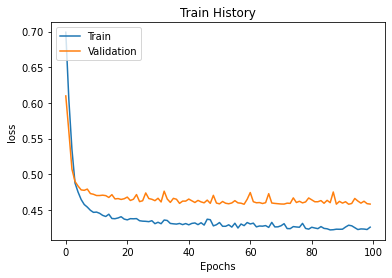

In [30]:
show_train_history(train_history, "loss", "val_loss")

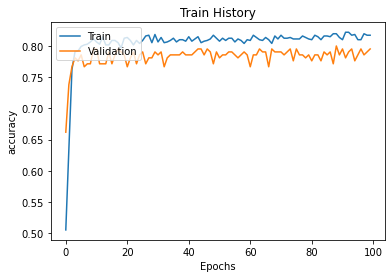

In [31]:
show_train_history(train_history, "accuracy", "val_accuracy")

## 恢复模型

In [34]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

latest

'Model_ckpt/7-Titanic\\Titanic.100-0.46.ckpt'

In [35]:
model.load_weights(latest)

## 评估模型

In [36]:
result = model.evaluate(x=x_test, y=y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8092


In [37]:
result

[0.45301368832588196, 0.8091602921485901]

In [38]:
model.metrics_names

['loss', 'accuracy']

## 模型应用：预测Jack和Rose的生存概率

In [39]:
use_selected_cols = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
use_selected_df_data = df_data[selected_cols]

In [40]:
use_selected_df_data

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",3,female,14.5000,1,0,14.4542,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C


In [41]:
# 旅客信息字段
use_selected_cols

['survived',
 'name',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked']

In [42]:
# 添加Jack和Rose的旅客信息
Jack_Info = [0, "Jack", 3, "male", 23, 1, 0, 5.0000, "S"]
Rose_Info = [1, "Rose", 1, "female", 20, 1, 0, 100.0000, "S"]

In [43]:
# 创建新的旅客DataFrame
passenger_pd = pd.DataFrame([Jack_Info, Rose_Info], columns=use_selected_cols)

In [44]:
# 在老数据后追加新旅客信息#
all_passenger_pd = use_selected_df_data.append(passenger_pd)

In [45]:
# 新加入数据将加到最后，此处显示倒数3条数据
all_passenger_pd[-3:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S
0,0,Jack,3,male,23.0,1,0,5.000,S
1,1,Rose,1,female,20.0,1,0,100.000,S


In [46]:
all_passenger_pd

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C
1308,0,"Zimmerman, Mr. Leo",3,male,29.0000,0,0,7.8750,S
0,0,Jack,3,male,23.0000,1,0,5.0000,S


In [47]:
# 数据准备
x_features, y_label = prepare_data(all_passenger_pd)

In [48]:
# 利用模型计算旅客生存概率
sur_probability = model.predict(x_features)

In [49]:
sur_probability[:5]

array([[0.97889173],
       [0.61295193],
       [0.9823484 ],
       [0.26621246],
       [0.97434944]], dtype=float32)

In [50]:
all_passenger_pd.insert(len(all_passenger_pd.columns), "sur_probability", sur_probability)

In [51]:
all_passenger_pd[-5:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,sur_probability
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.225,C,0.246948
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.225,C,0.242255
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S,0.111428
0,0,Jack,3,male,23.0,1,0,5.000,S,0.110999
1,1,Rose,1,female,20.0,1,0,100.000,S,0.977311
